In [8]:
import torch
import wandb

import sys
sys.path.append('../src')
from config import config_2
from clip_utils import CLIPModel
from PIL import Image
from train_eval_utils import find_matches, get_captions, get_image_embeddings

In [9]:
entity = 'image-captioning-clip'
project_name = 'image-captioning-CLIP'
exp_name = 'exp_2'
config = config_2
device = config['device']

In [10]:
run = wandb.init()
artifact = run.use_artifact(f'{entity}/{project_name}/{exp_name}:latest',
                            type='model')
artifact_dir = artifact.download()
run.finish()

model = CLIPModel(config)
model.load_state_dict(torch.load(f'{artifact_dir}/{exp_name}.pt'))
model.to(device)

wandb: Currently logged in as: ld2425. Use `wandb login --relogin` to force relogin


wandb: Downloading large artifact exp_2:latest, 508.68MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.1


You are using a model of type bert to instantiate a model of type distilbert. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at bert-base-uncased were not used when initializing DistilBertModel: ['bert.encoder.layer.9.attention.output.LayerNorm.weight', 'bert.encoder.layer.10.attention.output.dense.weight', 'bert.encoder.layer.11.attention.output.LayerNorm.bias', 'bert.encoder.layer.9.attention.output.LayerNorm.bias', 'bert.encoder.layer.3.attention.self.query.bias', 'bert.encoder.layer.2.attention.self.query.bias', 'cls.seq_relationship.bias', 'bert.encoder.layer.7.attention.output.LayerNorm.bias', 'bert.encoder.layer.11.attention.self.value.bias', 'bert.encoder.layer.9.intermediate.dense.weight', 'bert.encoder.layer.4.attention.output.dense.weight', 'bert.encoder.layer.3.attention.output.dense.weight', 'bert.encoder.layer.10.output.dense.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNo

CLIPModel(
  (image_encoder): ImageEncoder(
    (model): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act1): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (drop_block): Identity()
          (act2): ReLU(inplace=True)
          (aa): Identity()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1

wandb: Downloading large artifact exp_2:latest, 508.68MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.9


You are using a model of type bert to instantiate a model of type distilbert. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at bert-base-uncased were not used when initializing DistilBertModel: ['bert.encoder.layer.9.attention.output.LayerNorm.weight', 'bert.encoder.layer.10.attention.output.dense.weight', 'bert.encoder.layer.11.attention.output.LayerNorm.bias', 'bert.encoder.layer.9.attention.output.LayerNorm.bias', 'bert.encoder.layer.3.attention.self.query.bias', 'bert.encoder.layer.2.attention.self.query.bias', 'cls.seq_relationship.bias', 'bert.encoder.layer.7.attention.output.LayerNorm.bias', 'bert.encoder.layer.11.attention.self.value.bias', 'bert.encoder.layer.9.intermediate.dense.weight', 'bert.encoder.layer.4.attention.output.dense.weight', 'bert.encoder.layer.3.attention.output.dense.weight', 'bert.encoder.layer.10.output.dense.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNo

CLIPModel(
  (image_encoder): ImageEncoder(
    (model): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act1): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (drop_block): Identity()
          (act2): ReLU(inplace=True)
          (aa): Identity()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1

In [4]:
image_path = '../input/raw/flickr30k/Images/6155176.jpg'
n = 5

captions = get_captions(model, config, config['clean_file_path'], image_path, n)

  0%|          | 0/158914 [00:00<?, ?it/s]

A baby in blue pants is sitting on a red slide .
A person on a ladder with a baby underneath .
A small child wearing light blue overalls sits on a red slide .
Girl with green tank top standing in the middle of a train track with multicolor train cars to the right .
Boy in yellow shirt sitting in yellow playground slide


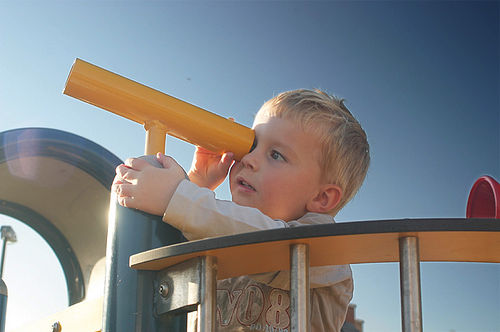

In [5]:
img = Image.open(image_path)

for caption in captions:
    print(caption)

img

In [6]:
df, image_embeddings = get_image_embeddings(model, config)

  0%|          | 0/4967 [00:00<?, ?it/s]

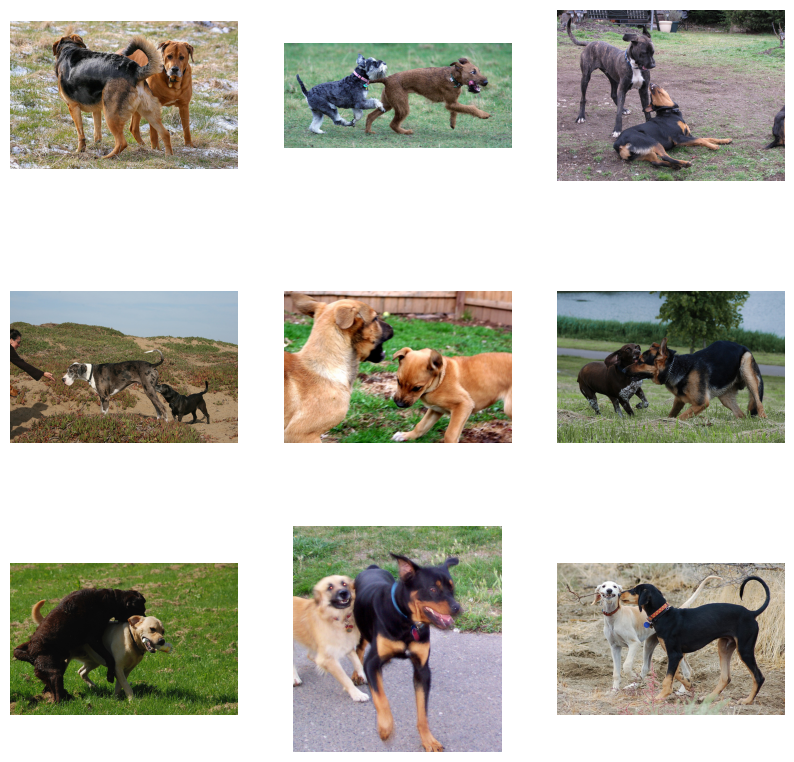

In [7]:
query = "one dog sitting in grass"

find_matches(model, df, image_embeddings, config, query)